<a href="https://colab.research.google.com/github/VikaK0828/Data-Science/blob/main/Unit_4_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Goal of Project

The goal of my project would likely be to predict a player’s total rebounds (TRB) based on their position and potentially other player-level characteristics.

In [ ]:
import pandas as pd

try:
    url = "https://github.com/thedarredondo/data-science-fundamentals/raw/main/Data/basketball2324.csv"
    df = pd.read_csv(url)
    print("Data loaded successfully!")

    print("Column names:", df.columns)
    print(df.head())

except Exception as e:
    print("An error occurred while loading the data:", e)


Data loaded successfully!
Column names: Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS',
       'Player-additional'],
      dtype='object')
                     Player   Pos  Age   Tm   G  GS    MP   FG   FGA    FG%  \
0          Precious Achiuwa  PF-C   24  TOT  74  18  1624  235   469  0.501   
1               Bam Adebayo     C   26  MIA  71  71  2416  530  1017  0.521   
2              Ochai Agbaji    SG   23  TOT  78  28  1641  178   433  0.411   
3              Santi Aldama    PF   23  MEM  61  35  1618  247   568  0.435   
4  Nickeil Alexander-Walker    SG   25  MIN  82  20  1921  236   538  0.439   

   ...  ORB  DRB  TRB  AST  STL  BLK  TOV   PF   PTS  Player-additional  
0  ...  191  296  487   97   46   68   83  143   565          achiupr01  
1  ...  159  578  737  278   81   66  162  159  1367          adebab

###Violin Plots

In this code, I’m loading a basketball dataset with stats from the 2023-2024 season, focusing on total rebounds (TRB) for different player positions. After checking out the data, I create a violin plot to show the rebound distribution by position. Each position has its own “violin” shape in the plot, so it’s easy to see how rebounds vary for each one. This helps spot patterns, like if some positions usually have more rebounds than others. I’ve also cleaned up the plot by removing extra lines and adding labels and a title, making it clearer and easier to understand before diving into deeper analysis.








                     Player   Pos  Age   Tm   G  GS    MP   FG   FGA    FG%  \
0          Precious Achiuwa  PF-C   24  TOT  74  18  1624  235   469  0.501   
1               Bam Adebayo     C   26  MIA  71  71  2416  530  1017  0.521   
2              Ochai Agbaji    SG   23  TOT  78  28  1641  178   433  0.411   
3              Santi Aldama    PF   23  MEM  61  35  1618  247   568  0.435   
4  Nickeil Alexander-Walker    SG   25  MIN  82  20  1921  236   538  0.439   

   ...  ORB  DRB  TRB  AST  STL  BLK  TOV   PF   PTS  Player-additional  
0  ...  191  296  487   97   46   68   83  143   565          achiupr01  
1  ...  159  578  737  278   81   66  162  159  1367          adebaba01  
2  ...   74  142  216   83   47   44   64  117   455          agbajoc01  
3  ...   72  280  352  138   43   54   69   89   654          aldamsa01  
4  ...   35  132  167  204   64   42   76  143   655          alexani01  

[5 rows x 30 columns]
Columns: Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', '

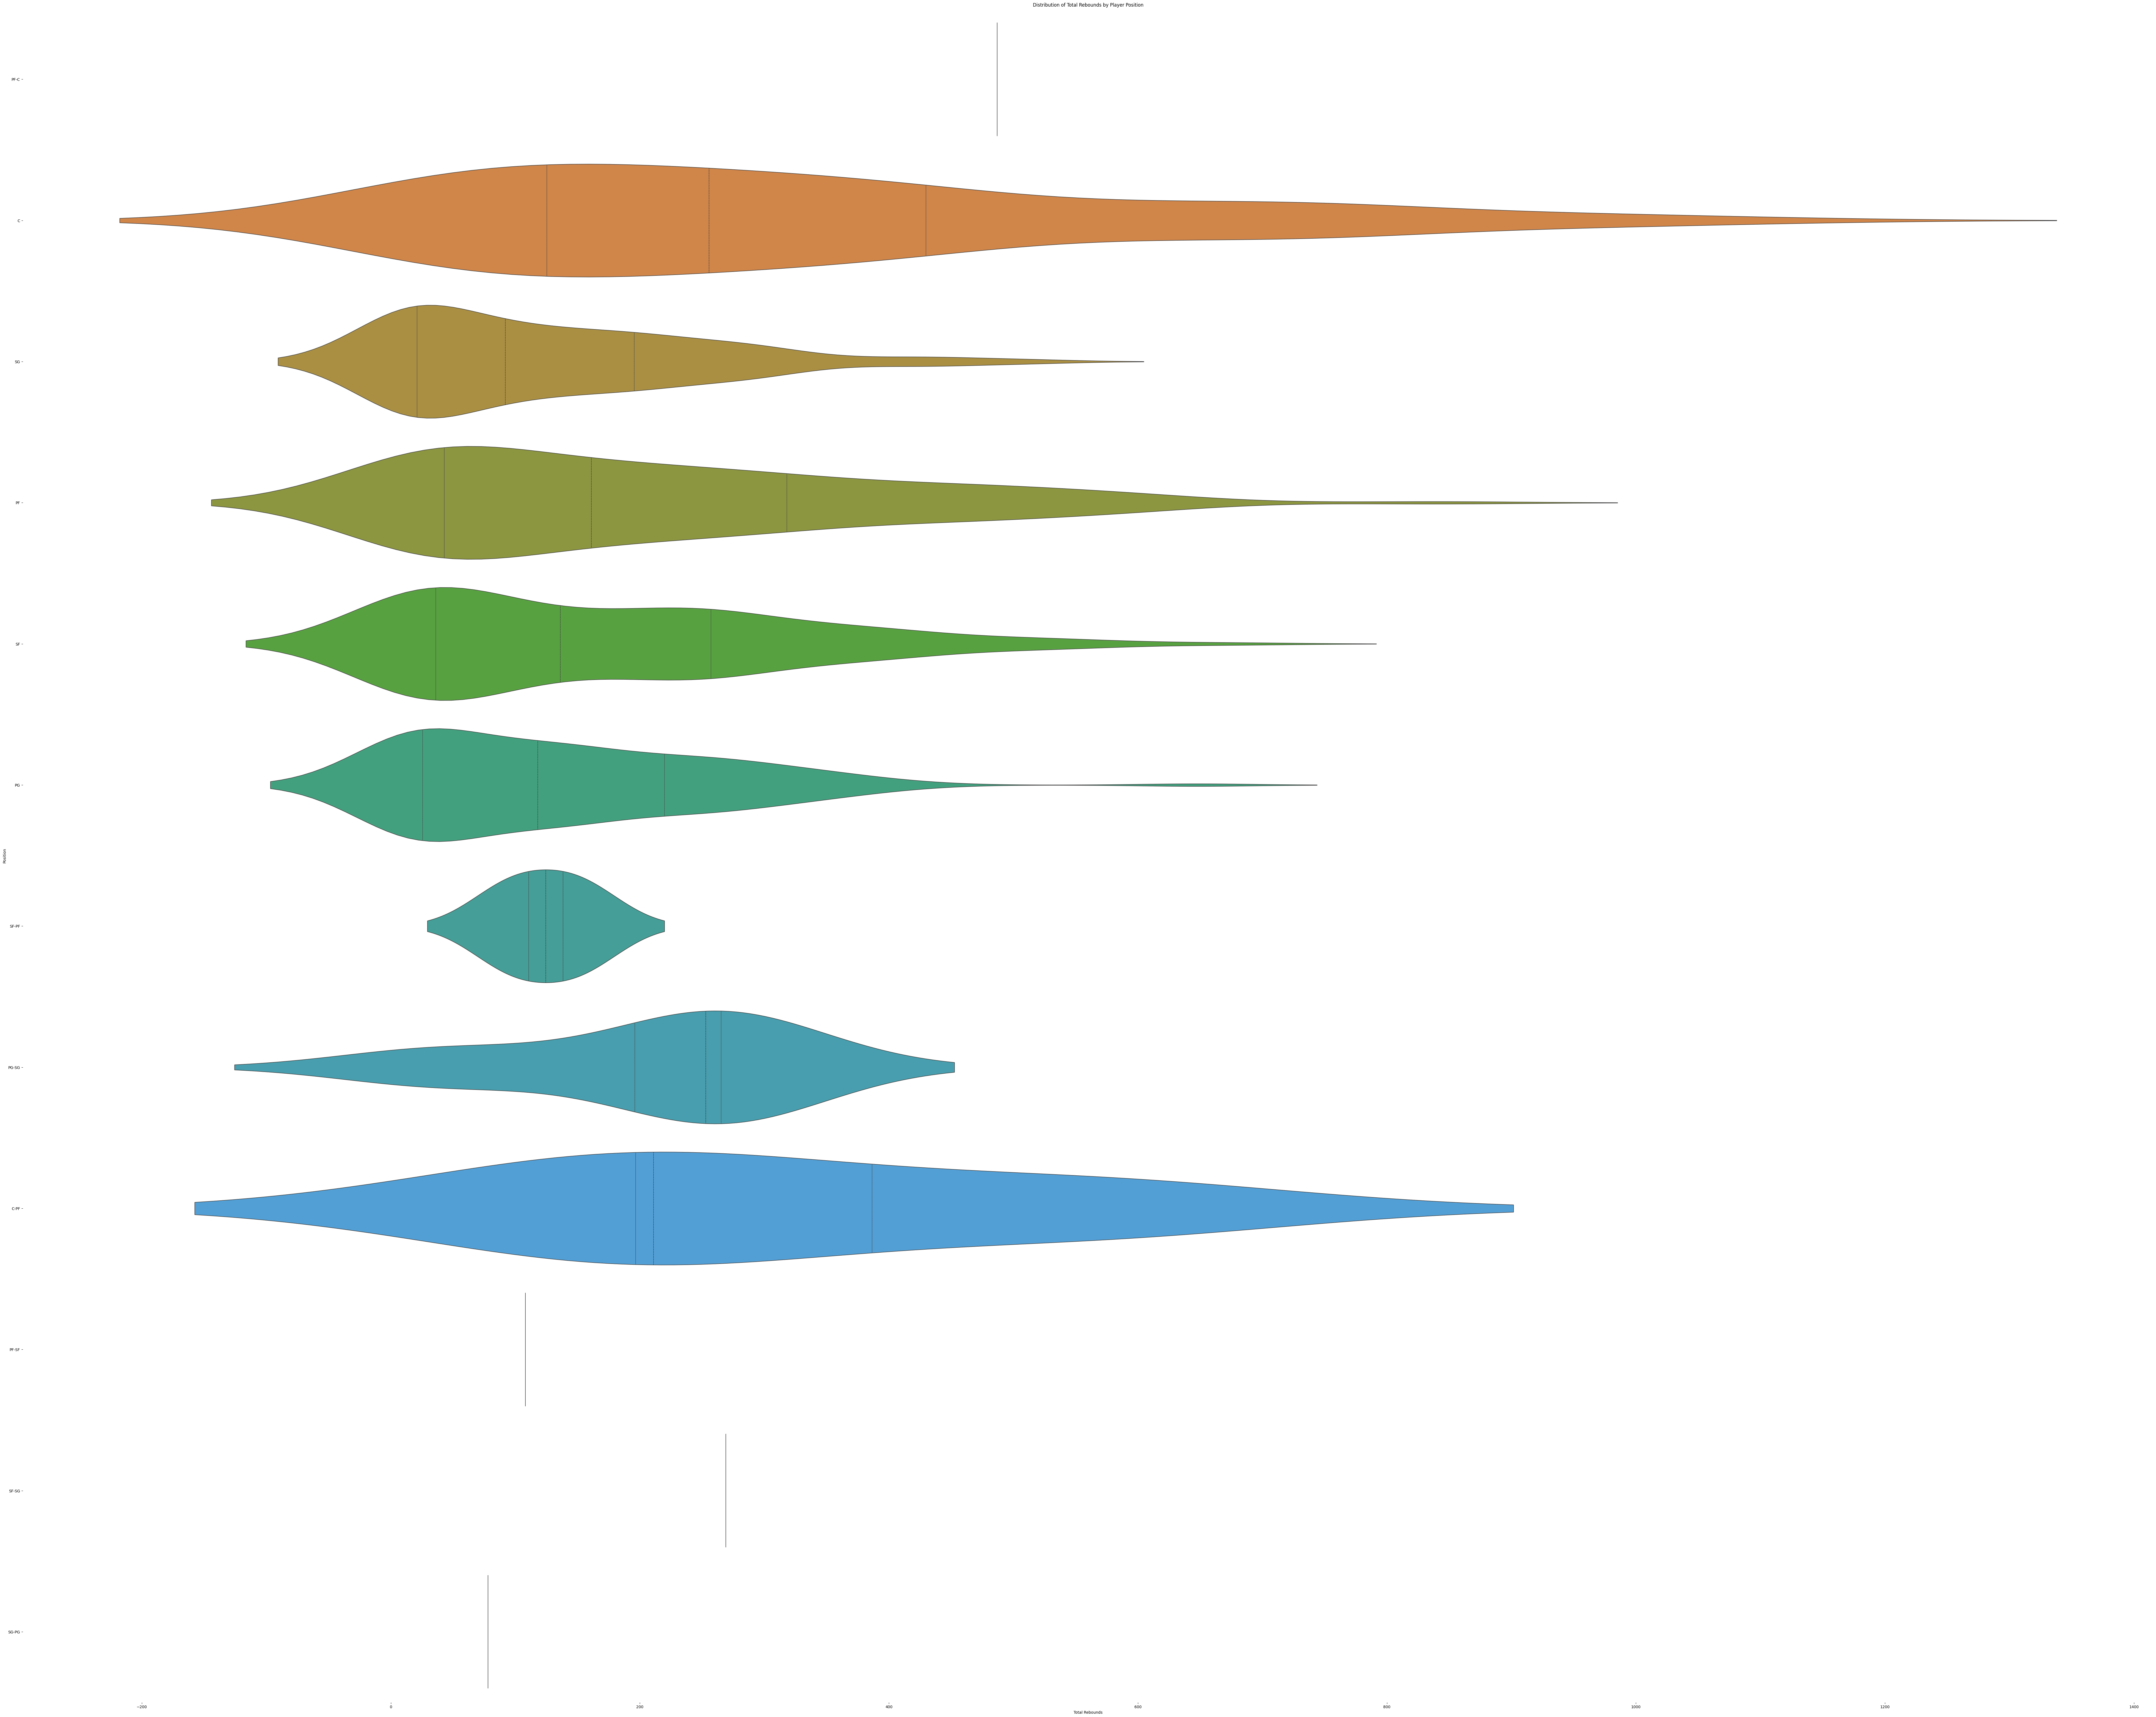

In [1]:
import pandas as pd

url = 'https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/main/Data/basketball2324.csv'
df = pd.read_csv(url)

print(df.head())
print("Columns:", df.columns)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(100, 80))
sns.violinplot(data=df, x='TRB', y='Pos', inner='quartile', hue='Pos', dodge=False)

sns.despine(top=True, right=True, bottom=True, left=True)
plt.xlabel("Total Rebounds")
plt.ylabel("Position")
plt.title("Distribution of Total Rebounds by Player Position")
plt.show()


next...

###Bayesian Hierarchical Model

In this code, I’m setting up a Bayesian hierarchical model to study total rebounds (TRB) in basketball based on player positions. First, I load the dataset, make an index for each player’s position, and build a PyMC model where each position has its own average (μ) and standard deviation (σ) for rebounds, both starting with normal priors. This setup allows the model to estimate rebounds for each player, with the data fitting a normal distribution. After sampling with MCMC, I use a ridge plot to visualize the results, showing the 99.7% highest density interval (HDI) for mean rebounds by position. This helps reveal both the uncertainty and differences in rebound stats across positions.










                     Player   Pos  Age   Tm   G  GS    MP   FG   FGA    FG%  \
0          Precious Achiuwa  PF-C   24  TOT  74  18  1624  235   469  0.501   
1               Bam Adebayo     C   26  MIA  71  71  2416  530  1017  0.521   
2              Ochai Agbaji    SG   23  TOT  78  28  1641  178   433  0.411   
3              Santi Aldama    PF   23  MEM  61  35  1618  247   568  0.435   
4  Nickeil Alexander-Walker    SG   25  MIN  82  20  1921  236   538  0.439   

   ...  ORB  DRB  TRB  AST  STL  BLK  TOV   PF   PTS  Player-additional  
0  ...  191  296  487   97   46   68   83  143   565          achiupr01  
1  ...  159  578  737  278   81   66  162  159  1367          adebaba01  
2  ...   74  142  216   83   47   44   64  117   455          agbajoc01  
3  ...   72  280  352  138   43   54   69   89   654          aldamsa01  
4  ...   35  132  167  204   64   42   76  143   655          alexani01  

[5 rows x 30 columns]


Output()

Output()

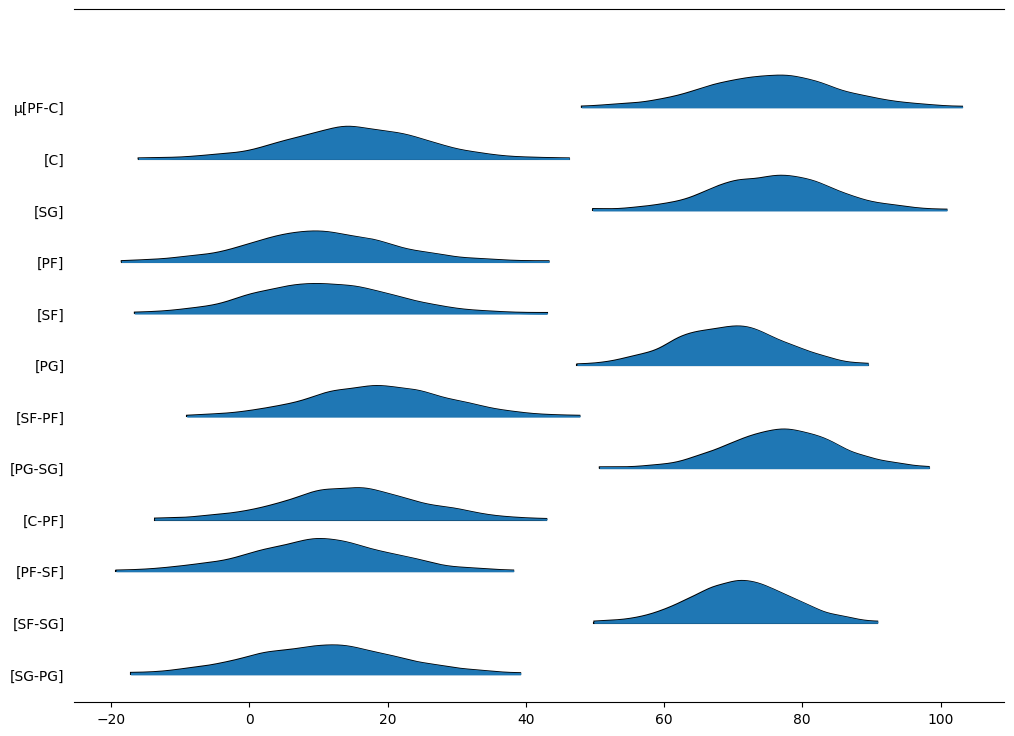

In [ ]:
import pymc as pm
import arviz as az
import pandas as pd
import numpy as np

url = 'https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/main/Data/basketball2324.csv'
df = pd.read_csv(url)

print(df.head())

df['Pos_idx'] = pd.Categorical(df['Pos']).codes

pos_coords = {"Pos": df['Pos'].unique()}

with pm.Model(coords=pos_coords) as basketball_model:
    μ = pm.Normal('μ', mu=0, sigma=10, dims="Pos")
    σ = pm.HalfNormal('σ', sigma=10, dims="Pos")

    y = pm.Normal('y', mu=μ[df['Pos_idx']], sigma=σ[df['Pos_idx']], observed=df['TRB'])

    idata_basketball = pm.sample()

axes = az.plot_forest(
    idata_basketball,
    kind="ridgeplot",
    var_names=['μ'],
    combined=True,
    figsize=(12, 9),
    hdi_prob=0.997
)


next...



In this code, I’m creating a hierarchical Bayesian model with PyMC to analyze total rebounds (TRB) in basketball by player positions. After loading the dataset, I assign an index to each position. In the model, I set up global parameters for the overall mean (μ_mu) and standard deviation (μ_sd) of rebounds across positions. Each position then has its own mean (μ) and standard deviation (σ) for rebounds, based on these global values. After running the model with MCMC sampling, I compare this hierarchical model to a non-hierarchical one by plotting the posterior distributions of the mean rebounds for each position in a forest plot. I also include a vertical line for the global mean (μ_mu) to show the overall trend, making it easier to see how each position’s rebounds relate to the average across all positions.







                     Player   Pos  Age   Tm   G  GS    MP   FG   FGA    FG%  \
0          Precious Achiuwa  PF-C   24  TOT  74  18  1624  235   469  0.501   
1               Bam Adebayo     C   26  MIA  71  71  2416  530  1017  0.521   
2              Ochai Agbaji    SG   23  TOT  78  28  1641  178   433  0.411   
3              Santi Aldama    PF   23  MEM  61  35  1618  247   568  0.435   
4  Nickeil Alexander-Walker    SG   25  MIN  82  20  1921  236   538  0.439   

   ...  ORB  DRB  TRB  AST  STL  BLK  TOV   PF   PTS  Player-additional  
0  ...  191  296  487   97   46   68   83  143   565          achiupr01  
1  ...  159  578  737  278   81   66  162  159  1367          adebaba01  
2  ...   74  142  216   83   47   44   64  117   455          agbajoc01  
3  ...   72  280  352  138   43   54   69   89   654          aldamsa01  
4  ...   35  132  167  204   64   42   76  143   655          alexani01  

[5 rows x 30 columns]


Output()

Output()

ERROR:pymc.stats.convergence:There were 732 divergences after tuning. Increase `target_accept` or reparameterize.
ERROR:pymc.stats.convergence:The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


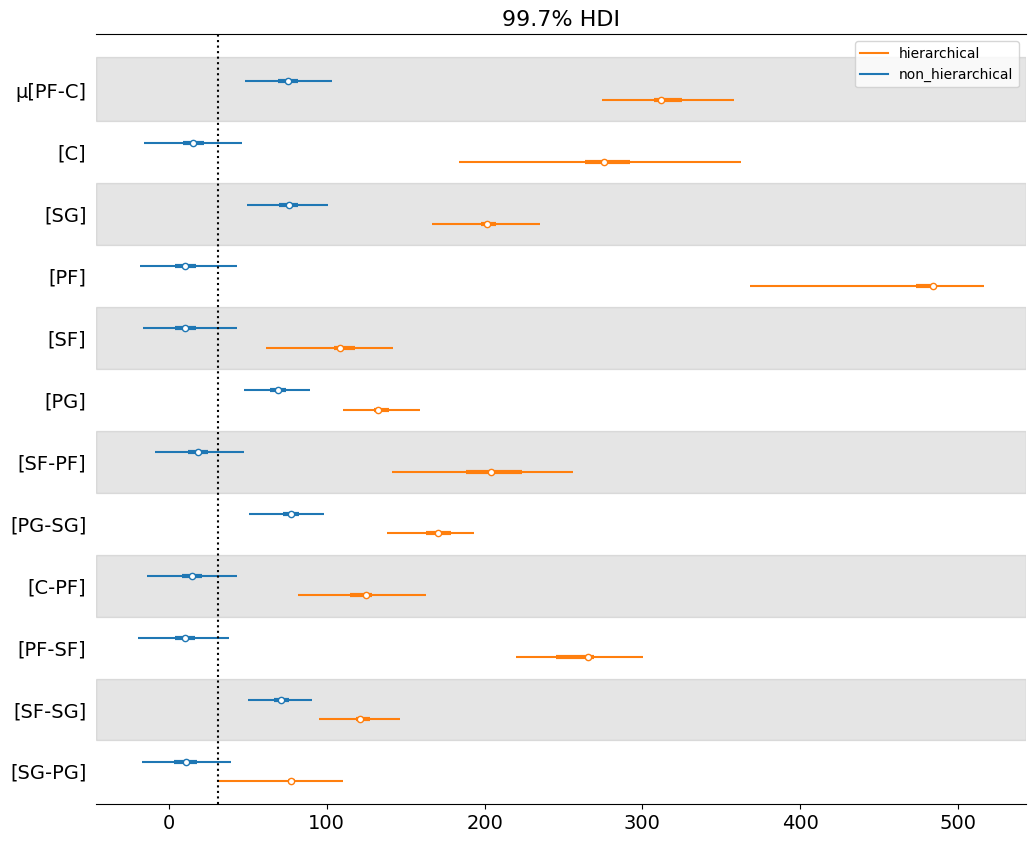

In [ ]:
import pymc as pm
import arviz as az
import pandas as pd
import numpy as np

url = 'https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/main/Data/basketball2324.csv'
df = pd.read_csv(url)

print(df.head())

df['Pos_idx'] = pd.Categorical(df['Pos']).codes

pos_coords = {"Pos": df['Pos'].unique()}

with pm.Model(coords=pos_coords) as basketball_h_model:
    μ_mu = pm.Normal('μ_mu', mu=0, sigma=10)
    μ_sd = pm.HalfNormal('μ_sd', sigma=10)

    μ = pm.Normal('μ', mu=μ_mu, sigma=μ_sd, dims="Pos")
    σ = pm.HalfNormal('σ', sigma=10, dims="Pos")

    y = pm.Normal('y', mu=μ[df['Pos_idx']], sigma=σ[df['Pos_idx']], observed=df['TRB'])

    idata_basketball_h = pm.sample()

axes = az.plot_forest([idata_basketball, idata_basketball_h], kind="forestplot",
                      model_names=['non_hierarchical', 'hierarchical'],
                      var_names='μ', combined=True, figsize=(12, 10), hdi_prob=0.997)

y_lims = axes[0].get_ylim()
axes[0].vlines(idata_basketball_h.posterior['μ_mu'].mean(), *y_lims, color="k", ls=":")


next....

In [ ]:
import pandas as pd

url = "https://github.com/thedarredondo/data-science-fundamentals/raw/main/Data/basketball2324.csv"
cs_data = pd.read_csv(url)

print(cs_data.columns)
print(cs_data.head())


Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS',
       'Player-additional'],
      dtype='object')
                     Player   Pos  Age   Tm   G  GS    MP   FG   FGA    FG%  \
0          Precious Achiuwa  PF-C   24  TOT  74  18  1624  235   469  0.501   
1               Bam Adebayo     C   26  MIA  71  71  2416  530  1017  0.521   
2              Ochai Agbaji    SG   23  TOT  78  28  1641  178   433  0.411   
3              Santi Aldama    PF   23  MEM  61  35  1618  247   568  0.435   
4  Nickeil Alexander-Walker    SG   25  MIN  82  20  1921  236   538  0.439   

   ...  ORB  DRB  TRB  AST  STL  BLK  TOV   PF   PTS  Player-additional  
0  ...  191  296  487   97   46   68   83  143   565          achiupr01  
1  ...  159  578  737  278   81   66  162  159  1367          adebaba01  
2  ...   74  142  216   83   47   

next...

In this code, I am analyzing total rebounds (TRB) in basketball based on player positions using a non-hierarchical Bayesian model in PyMC. The dataset is loaded, and the unique player positions are extracted. I create an index (pos_idx) for each player's position to link them to the appropriate parameters in the model. The model defines a normal distribution for the mean (μ) and a half-normal distribution for the standard deviation (σ) of rebounds for each position. The observed total rebounds (TRB) are modeled using a normal distribution with the position-specific mean and standard deviation. After sampling from the posterior, I visualize the results using a ridge plot, which displays the posterior distributions of the means (μ) for each position, with a high-density interval (HDI) of 99.7%, to show the uncertainty in the estimated rebound statistics for each position.

Output()

Output()

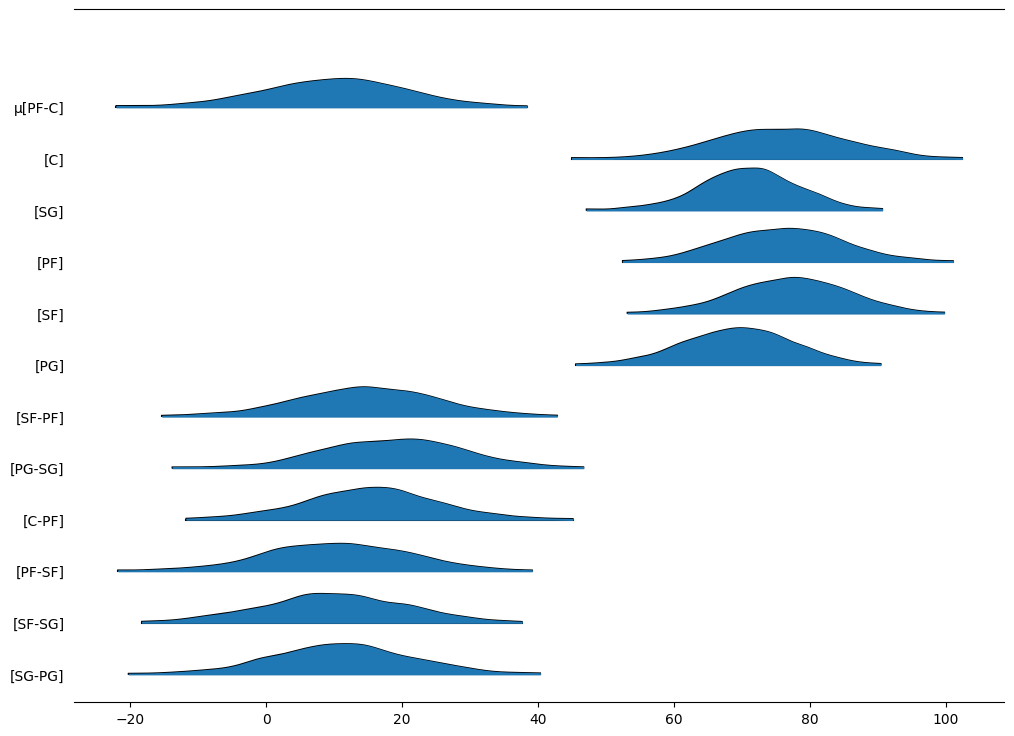

In [ ]:
import pandas as pd
import pymc as pm
import arviz as az
import numpy as np

url = "https://github.com/thedarredondo/data-science-fundamentals/raw/main/Data/basketball2324.csv"
cs_data = pd.read_csv(url)

pos_types = cs_data['Pos'].unique()

aa_coords = {
    'Pos': pos_types
}

pos_idx = np.array([np.where(pos_types == pos)[0][0] for pos in cs_data['Pos']])

with pm.Model(coords=aa_coords) as cs_nh_model:

    μ = pm.Normal('μ', mu=0, sigma=10, dims="Pos")
    σ = pm.HalfNormal('σ', sigma=10, dims="Pos")

    y = pm.Normal('y',
                  mu=μ[pos_idx],
                  sigma=σ[pos_idx],
                  observed=cs_data['TRB'])

    idata_cs_nh = pm.sample()

axes = az.plot_forest(idata_cs_nh, kind="ridgeplot", var_names='μ', combined=True, figsize=(12, 9), hdi_prob=0.997)

plt.show()


next...

###Violin Plot

In this code, you’re using Seaborn and Matplotlib to create a violin plot that shows the distribution of total rebounds (TRB) for all players in the dataset. By setting y='TRB', the total rebounds are plotted along the y-axis, while inner='quart' adds quartile lines within each “violin” shape, providing extra detail about how rebounds are spread across players. The sns.despine() function removes the top, right, bottom, and left edges of the plot for a cleaner look, and the title "Distribution of Total Rebounds (TRB)" gives clear context. This plot makes it easy to see the overall spread, central trends, and any outliers in the rebound stats for the entire group of players.

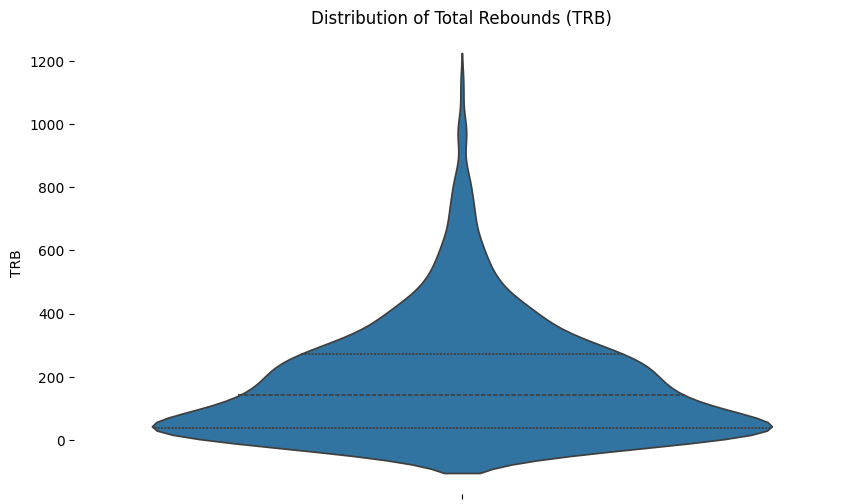

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.violinplot(data=cs_data, y='TRB', inner='quart')

sns.despine(top=True, right=True, bottom=True, left=True)
plt.title('Distribution of Total Rebounds (TRB)')

plt.show()



next....

###Analyzing Probability

In this code, I'm creating a Bayesian model to analyze the probability of making a field goal (FG) based on field goal attempts (FGA) for basketball players in different positions. After loading the dataset, I assign a categorical index to each position and define a global Beta distribution for the mean field goal probability (μ), along with a Gamma distribution (ν) to represent the variability across positions. Position-specific probabilities (μ_p and ν_p) are modeled using these global parameters. For each player, a Beta distribution (θ) models the individual probability of making a shot, and a Binomial distribution is used to represent the observed field goals (FG) made out of attempts (FGA). After running the model with MCMC sampling, I use a trace plot to visualize the posterior distributions of the parameters, which helps to understand the field goal probabilities across different positions.

Output()

Output()

array([[<Axes: title={'center': 'θ'}>, <Axes: title={'center': 'θ'}>],
       [<Axes: title={'center': 'μ'}>, <Axes: title={'center': 'μ'}>],
       [<Axes: title={'center': 'μ_p'}>, <Axes: title={'center': 'μ_p'}>],
       [<Axes: title={'center': 'ν'}>, <Axes: title={'center': 'ν'}>],
       [<Axes: title={'center': 'ν_p'}>, <Axes: title={'center': 'ν_p'}>]],
      dtype=object)

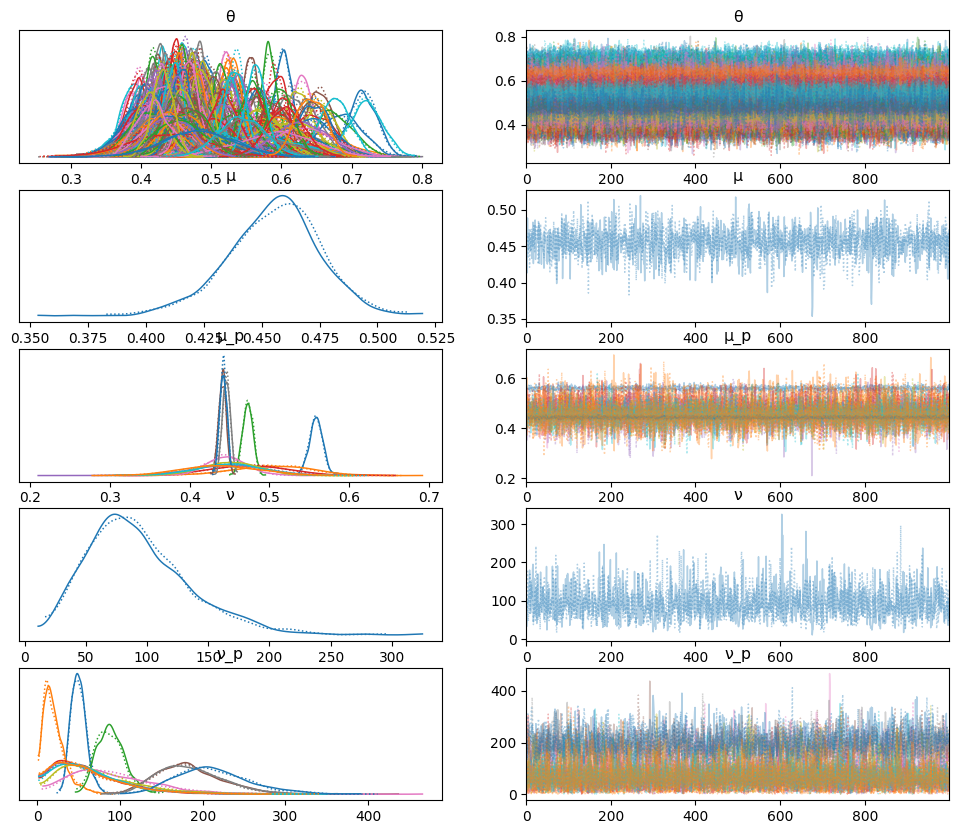

In [ ]:
import pymc as pm
import arviz as az
import pandas as pd
import numpy as np

cs_data = pd.read_csv('https://github.com/thedarredondo/data-science-fundamentals/raw/main/Data/basketball2324.csv')


pos_idx = cs_data['Pos'].astype('category').cat.codes

sccr_coords = {
    'pos': cs_data['Pos'].unique()
}

with pm.Model(coords=sccr_coords) as sccr_model:

    μ = pm.Beta('μ', alpha=2, beta=20)
    ν = pm.Gamma('ν', mu=55, sigma=45)

    μ_p = pm.Beta('μ_p', mu=μ, nu=ν, dims="pos")
    ν_p = pm.Gamma('ν_p', mu=55, sigma=45, dims="pos")

    θ = pm.Beta('θ', mu=μ_p[pos_idx], nu=ν_p[pos_idx])

    _ = pm.Binomial('gs',
                    n=cs_data['FGA'].values,
                    p=θ,
                    observed=cs_data['FG'].values)


    idata_sccr = pm.sample(target_accept=0.95)

az.plot_trace(idata_sccr)



next....

###Analyzing Basketball Shooting Percentages

In this code, I'm constructing a Bayesian hierarchical model to analyze basketball shooting percentages (FG%) by player and position. After loading the data, I assign categorical codes to each player and position. In the model, I define a global mean shooting percentage (μ) and standard deviations (σ_position and σ_player) to capture the variability in shooting percentages across positions and players. Position-specific means (μ_p) are modeled around this global mean, and each player's mean (θ) is centered around the mean for their respective position. The observed shooting percentages are modeled as normally distributed around these individual player means, with a small standard deviation to account for player-level performance differences. After sampling the model, I plot the posterior distributions for the global shooting mean, the mean shooting percentage for a specific position, and the mean for an individual player to explore the variability at each level.

In [ ]:

print(data.columns)


Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS',
       'Player-additional'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/pymc/model/core.py:1278: ImputationWarning: Data in observed contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)


Output()

Output()

ERROR:pymc.stats.convergence:There were 270 divergences after tuning. Increase `target_accept` or reparameterize.
ERROR:pymc.stats.convergence:The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


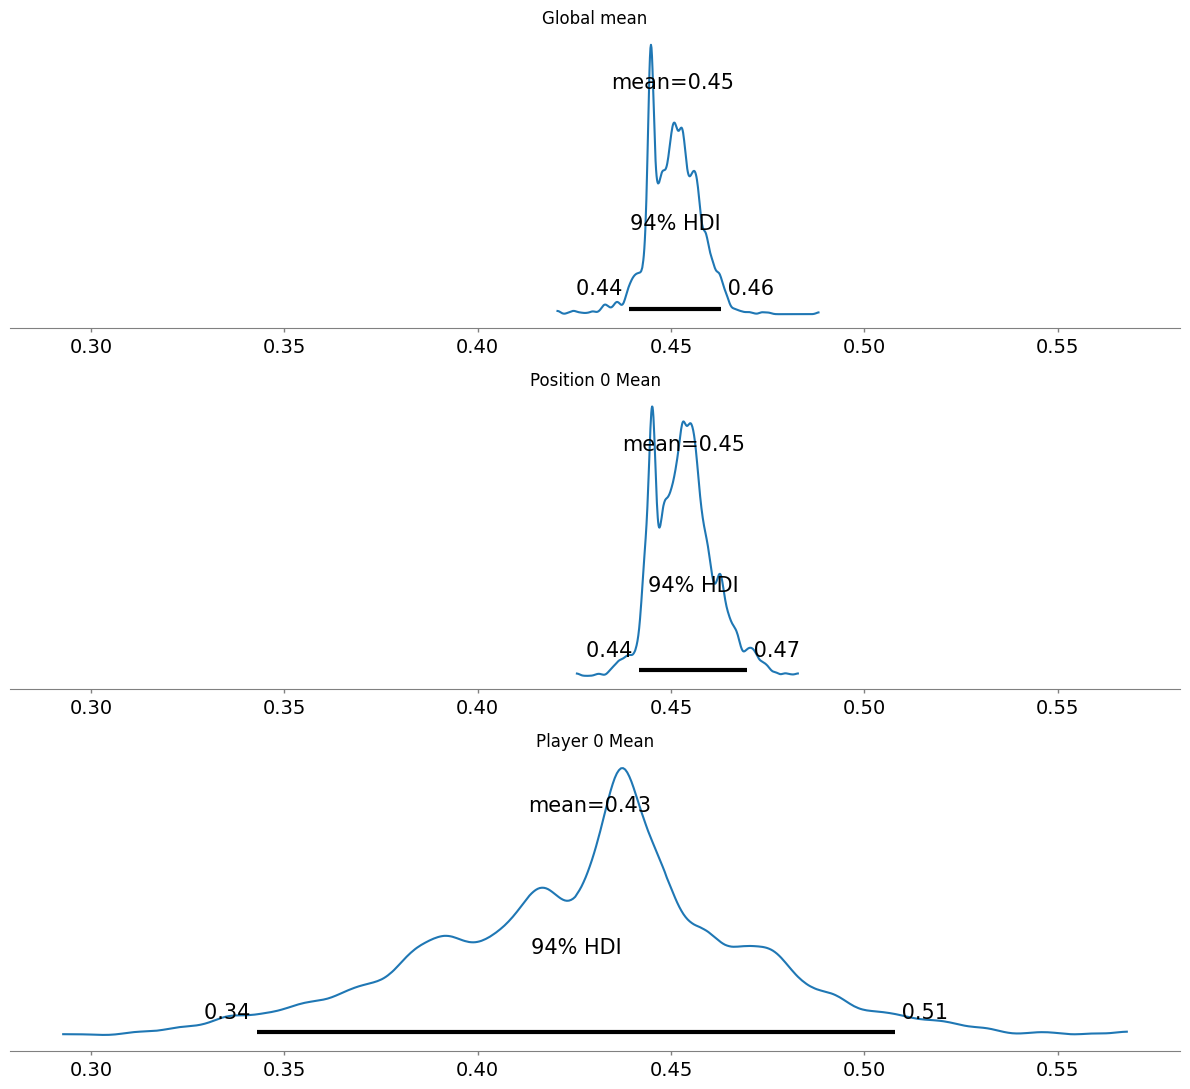

In [ ]:
import pandas as pd
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt

data = pd.read_csv('https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/main/Data/basketball2324.csv')

data['position_code'] = data['Pos'].astype('category').cat.codes
data['player_id_code'] = data['Player'].astype('category').cat.codes

n_positions = data['position_code'].nunique()
n_players = data['player_id_code'].nunique()

with pm.Model() as model:
    model.add_coord("position", range(n_positions))
    model.add_coord("player", range(n_players))

    global_mean = pm.Normal('μ', mu=0.1, sigma=0.1)

    position_sd = pm.HalfNormal('σ_position', sigma=0.1)
    player_sd = pm.HalfNormal('σ_player', sigma=0.1)

    position_means = pm.Normal('μ_p', mu=global_mean, sigma=position_sd, dims='position')

    player_means = pm.Normal('θ', mu=position_means[data['position_code']], sigma=player_sd, dims='player')

    observed_shooting = pm.Normal('observed', mu=player_means[data['player_id_code']], sigma=0.05, observed=data['FG%'])

    idata_basketball = pm.sample(1000, return_inferencedata=True)

_, ax = plt.subplots(3, 1, figsize=(12, 11), sharex=True)

position_index = 0
player_index = 0

az.plot_posterior(idata_basketball, var_names='μ', ax=ax[0])
ax[0].set_title("Global mean")

az.plot_posterior(idata_basketball.posterior.sel(position=position_index), var_names='μ_p', ax=ax[1])
ax[1].set_title(f"Position {position_index} Mean")

az.plot_posterior(idata_basketball.posterior.sel(player=player_index), var_names='θ', ax=ax[2])
ax[2].set_title(f"Player {player_index} Mean")

plt.tight_layout()
plt.show()



___________________________________________________

###Summary


In conclusion, our analysis shows that total rebounds (TRB) differ noticeably by player position, with each position having its own typical rebound range. By looking at both the global average and the position-specific means, we can see which positions tend to get more rebounds overall. The player-level data shows additional differences among players within the same position, suggesting that while a player’s position impacts their rebounding, their individual characteristics also matter a lot. This model helps us better understand how both a player’s position and unique traits work together to influence their performance in total rebounds.
